In [3]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings

%load_ext watermark

%watermark -v -p os,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.8.0

os        : unknown
pandas    : 1.5.2
matplotlib: 3.6.2



Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.8.0

os        : unknown
pandas    : 1.5.2
matplotlib: 3.6.2

In [4]:
warnings.filterwarnings("ignore")
#warnings.filterwarnings("defalt")

In [5]:
# Global Variables

data_file_path = 'Data'
image_file_path = 'Images'

migration_df = pd.read_csv(os.path.join(data_file_path, "Master_Migration_2000_2019.csv"))
migration_full_range_df = pd.read_csv(os.path.join(data_file_path, "Migration_2000_2019.csv"))


In [6]:
def generate_bar_chart (ax, start_year, stop_year, country_count, field_name, ascending ) :

    the_df = migration_full_range_df
    the_df.sort_values ( by = field_name, ascending=False, inplace=True )

    top_countries = the_df.head(country_count)
    bottom_countries = the_df.tail(country_count)

    combined_data = pd.concat([top_countries, bottom_countries])

    bars = ax.barh(combined_data['country'], combined_data['migration_count'],
                   color=[('red' if val < 0 else 'blue') for val in combined_data['migration_count']])
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Adjust the fontsize
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Adjust the fontsize
    ax.set_xlabel('Average Net Migration', fontsize=12)
    ax.set_title(f'Average Net Migration ( {start_year} - {stop_year} )', fontsize=15)
    ax.legend(handles=[bars[0], bars[-1]], labels=['Migration Inflow', 'Migration Outflow'])
    ax.invert_yaxis()  # Invert y-axis to have the highest value at the top



In [7]:
def generate_stack_chart (ax, start_year, stop_year, country_count, field_name, ascending ) :

    filtered_migration_df = migration_df[(migration_df['year'] >= start_year) & (migration_df['year'] <= stop_year)]

    # Group by country and calculate total migration over the years
    grouped = filtered_migration_df.groupby('country')[field_name].sum().sort_values(ascending=ascending)

    # Select the top countries
    top_countries = grouped.head(country_count)
    ordered_countries = top_countries.sort_values(ascending=ascending).index

    print(top_countries)
    print(ordered_countries)

    filtered_migration_df[field_name] = filtered_migration_df[field_name].abs()

    pivot_df = filtered_migration_df[filtered_migration_df['country'].isin(top_countries.index)].pivot(index='year', columns='country', values=field_name)

    pivot_df.index = pivot_df.index.astype(str)
    scaling_factor = 1e6
    pivot_df /= scaling_factor

    stack_data = [pivot_df[country] for country in ordered_countries]

    print(pivot_df)

    ax.stackplot(pivot_df.index, stack_data, labels=ordered_countries)

    # Create the stack plot with highest values at the bottom
    #ax.figure(figsize=(10, 6))
    #ax.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns[::-1])  # Transpose the values

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Adjust the fontsize
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)  # Adjust the fontsize
    ax.set_xlabel('Year', fontsize=15)


In [8]:
def generate_3_Panel_chart ( start_year, stop_year, country_count ) :

    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig, width_ratios=[1, 2])

    # Create axes for each cell in the grid
    ax1 = fig.add_subplot(gs[:, 0])
    ax3 = fig.add_subplot(gs[0, 1])
    ax4 = fig.add_subplot(gs[1, 1])

    # Create charts and images

    generate_bar_chart (ax1, start_year, stop_year, country_count, 'migration_count', False)

    ax3.set_ylabel('Migration Inflows as Percent of Population', fontsize=15)
    ax3.set_title(f'Top {country_count} Countries with Highest Migration Inflows as Percent of Population')
    generate_stack_chart (ax3, start_year, stop_year, country_count, 'migration_percent', False)
    ax3.legend(loc='upper right')

    ax4.set_ylabel('Migration Outflow as Percent of Population', fontsize=15)
    ax4.set_title(f'Top {country_count} Countries with Highest Migration Outflows as Percent of Population')
    generate_stack_chart (ax4, start_year, stop_year, country_count, 'migration_percent', True)
    ax4.legend(loc='upper left')

    # Adjust layout
    plt.tight_layout()


    plt.savefig( os.path.join ( image_file_path, f"3_Panel_Percent_chart_{start_year}-{stop_year}.jpg" ) )  # For JPG format
    plt.savefig( os.path.join ( image_file_path, f"3_Panel_Percent_chart_{start_year}-{stop_year}.png" ))  # For PNG format


country
Qatar                       127.366538
United Arab Emirates         82.418632
Turks and Caicos Islands     66.462336
Kuwait                       50.415556
Bahrain                      45.821722
Cayman Islands               38.569151
British Virgin Islands       34.710322
Macao SAR, China             33.490000
Equatorial Guinea            33.110529
Jordan                       30.122482
Luxembourg                   29.910700
Oman                         29.813555
Maldives                     29.095444
Singapore                    28.063560
San Marino                   23.755503
Name: migration_percent, dtype: float64
Index(['Qatar', 'United Arab Emirates', 'Turks and Caicos Islands', 'Kuwait',
       'Bahrain', 'Cayman Islands', 'British Virgin Islands',
       'Macao SAR, China', 'Equatorial Guinea', 'Jordan', 'Luxembourg', 'Oman',
       'Maldives', 'Singapore', 'San Marino'],
      dtype='object', name='country')
country       Bahrain  British Virgin Islands  Cayman Islands 

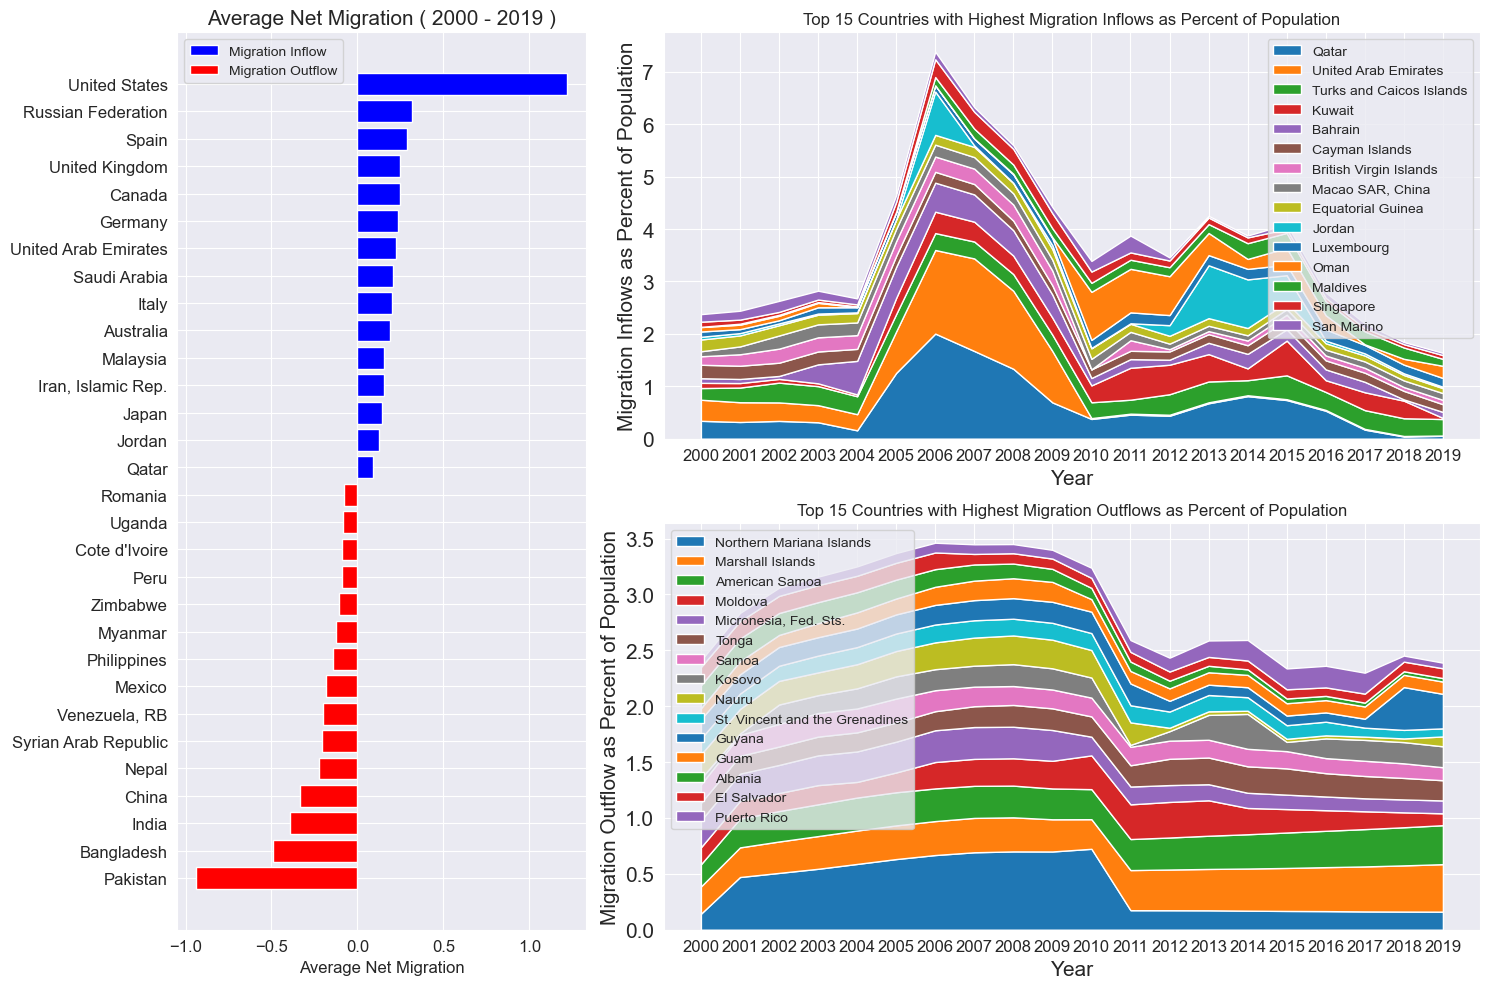

In [9]:
country_count = 15

start_year = 2000
stop_year = 2019

generate_3_Panel_chart ( start_year, stop_year, country_count )


country
Qatar                       127.366538
United Arab Emirates         82.418632
Turks and Caicos Islands     66.462336
Kuwait                       50.415556
Bahrain                      45.821722
Cayman Islands               38.569151
British Virgin Islands       34.710322
Macao SAR, China             33.490000
Equatorial Guinea            33.110529
Jordan                       30.122482
Luxembourg                   29.910700
Oman                         29.813555
Maldives                     29.095444
Singapore                    28.063560
San Marino                   23.755503
Name: migration_percent, dtype: float64
Index(['Qatar', 'United Arab Emirates', 'Turks and Caicos Islands', 'Kuwait',
       'Bahrain', 'Cayman Islands', 'British Virgin Islands',
       'Macao SAR, China', 'Equatorial Guinea', 'Jordan', 'Luxembourg', 'Oman',
       'Maldives', 'Singapore', 'San Marino'],
      dtype='object', name='country')
country       Bahrain  British Virgin Islands  Cayman Islands 

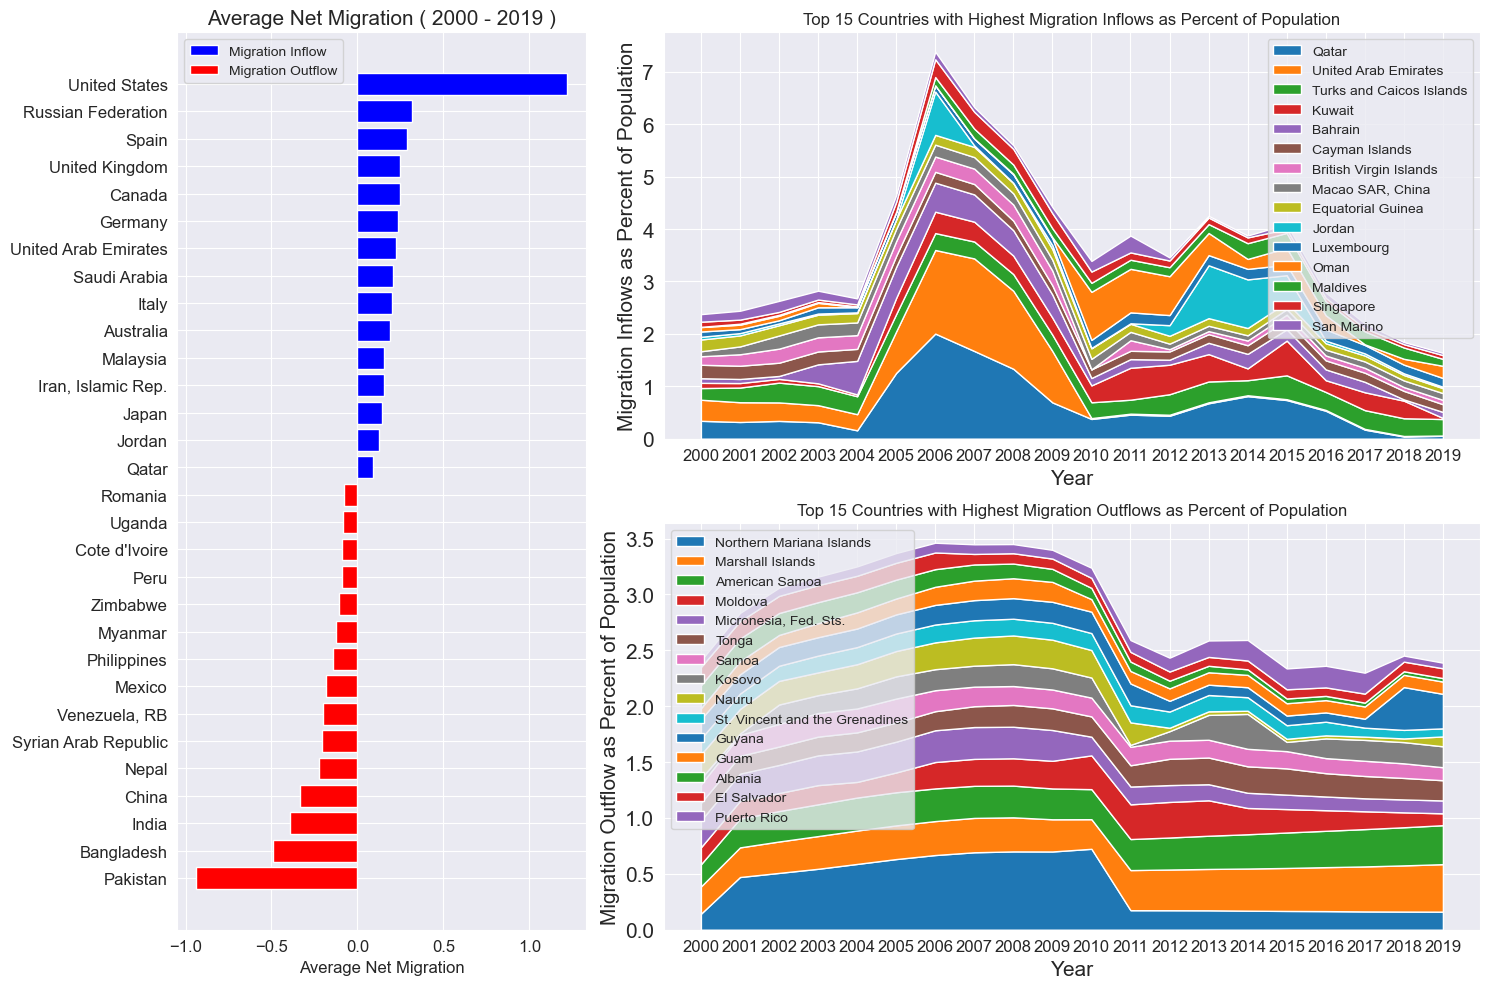

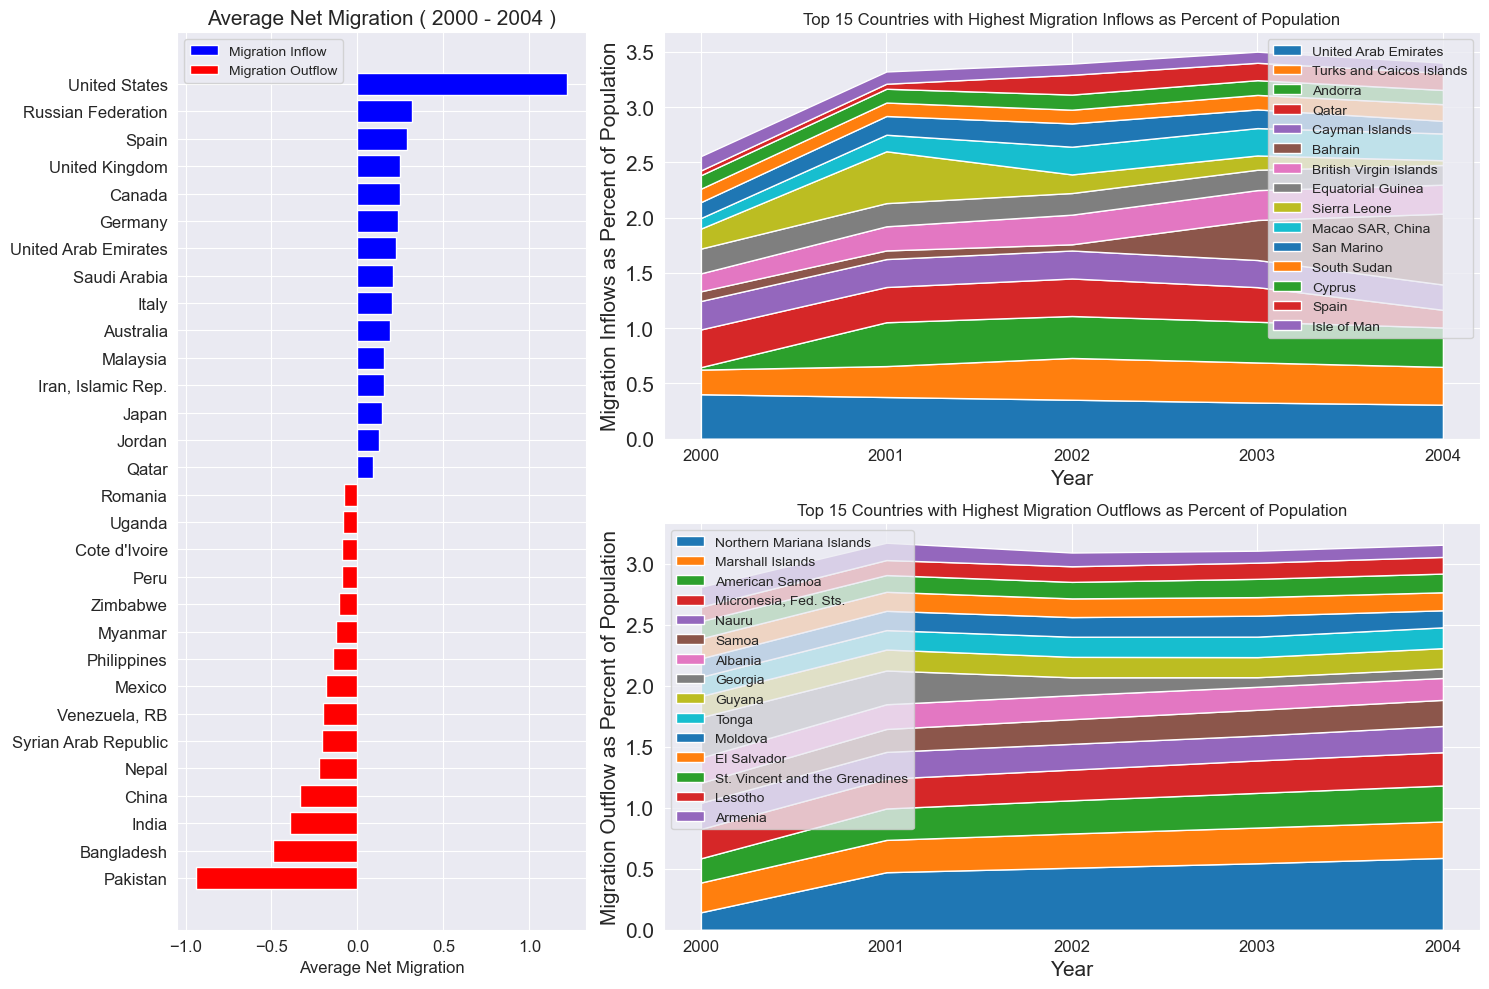

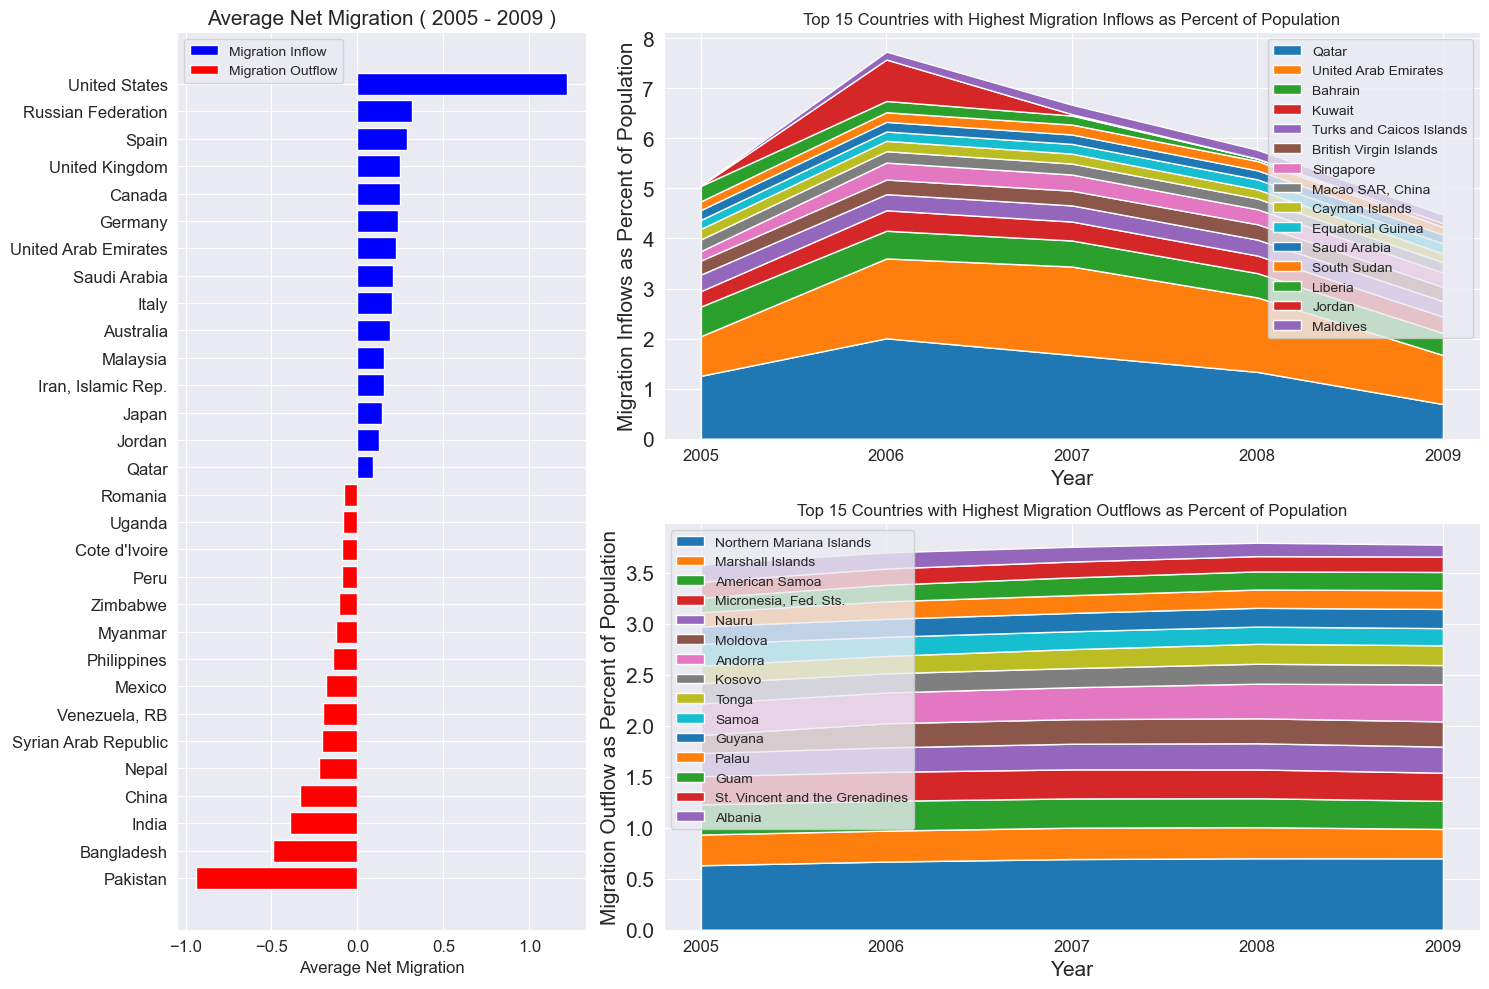

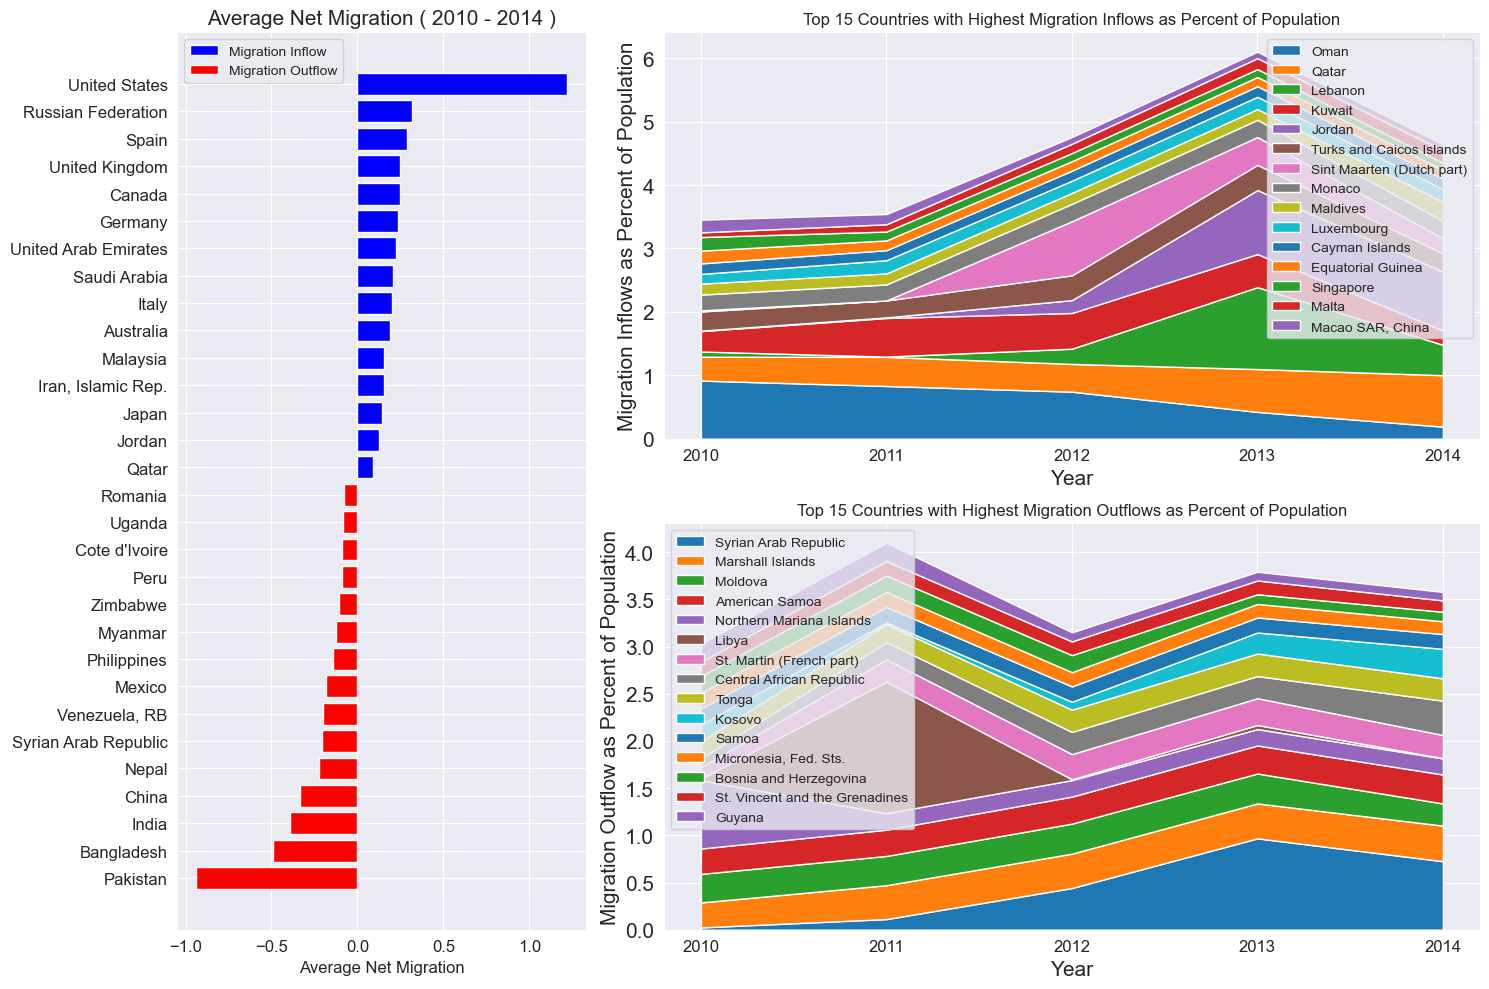

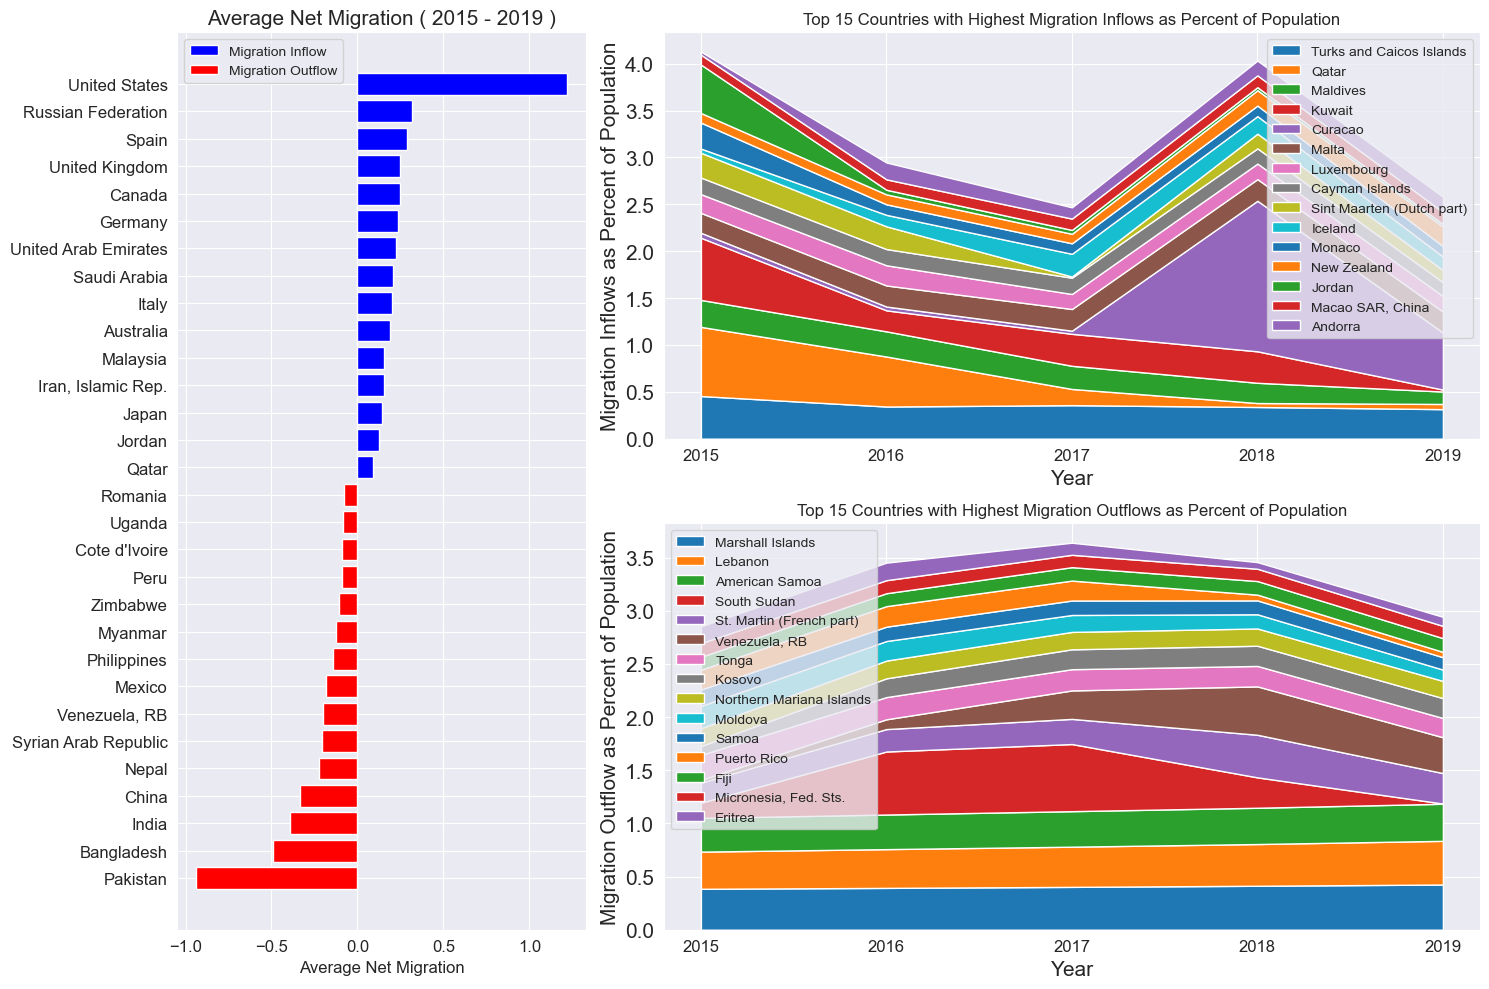

In [14]:
country_count = 15

start_year = 2000
stop_year = 2019

generate_3_Panel_chart ( start_year, stop_year, country_count )

start_year = 2000
stop_year = 2004

generate_3_Panel_chart ( start_year, stop_year, country_count )

start_year = 2005
stop_year = 2009

generate_3_Panel_chart ( start_year, stop_year, country_count )

start_year = 2010
stop_year = 2014

generate_3_Panel_chart ( start_year, stop_year, country_count )

start_year = 2015
stop_year = 2019

generate_3_Panel_chart ( start_year, stop_year, country_count )
